# OK Cupid Date-A-Scientist

### A machine learning (ML) \/ natural language processing (NLP) portfolio project

This is a portfolio project summing up a ML part of Codecademy's "Data Scientist: Natural Language Processing Specialist" career path – covering both supervised (regressors, classifiers) and unsupervised (clusters, feature reductors) algorithms:
namely decision trees, random forests, K-nearest neighbors, K-mean cluster, support vector machines, principal component analysis and naive bayes.

I'll sample some analysing data provided by Codecademy / OK Cupid.

### Importing libraries and data exploration (EDA)

I'll start by importing libraries and modules we will use. For now pandas, matplotlib, and seaborn for data exploration.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder

We load the data and peek into it.

In [2]:
profiles = pd.read_csv("profiles.csv")
print(profiles.head())

   age       body_type               diet    drinks      drugs  \
0   22  a little extra  strictly anything  socially      never   
1   35         average       mostly other     often  sometimes   
2   38            thin           anything  socially        NaN   
3   23            thin         vegetarian  socially        NaN   
4   29        athletic                NaN  socially      never   

                           education  \
0      working on college/university   
1              working on space camp   
2     graduated from masters program   
3      working on college/university   
4  graduated from college/university   

                                              essay0  \
0  about me:<br />\r\n<br />\r\ni would love to t...   
1  i am a chef: this is what that means.<br />\r\...   
2  i'm not ashamed of much, but writing public te...   
3          i work in a library and go to school. . .   
4  hey how's it going? currently vague on the pro...   

                         

In [3]:
profiles.columns

Index(['age', 'body_type', 'diet', 'drinks', 'drugs', 'education', 'essay0',
       'essay1', 'essay2', 'essay3', 'essay4', 'essay5', 'essay6', 'essay7',
       'essay8', 'essay9', 'ethnicity', 'height', 'income', 'job',
       'last_online', 'location', 'offspring', 'orientation', 'pets',
       'religion', 'sex', 'sign', 'smokes', 'speaks', 'status'],
      dtype='object')

In [4]:
print(profiles.orientation.unique())

['straight' 'bisexual' 'gay']


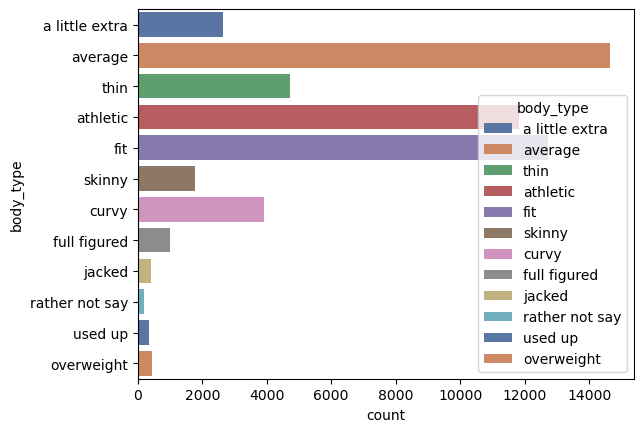

In [5]:
sns.countplot(y="body_type", data=profiles, hue="body_type", palette="deep")
plt.show()

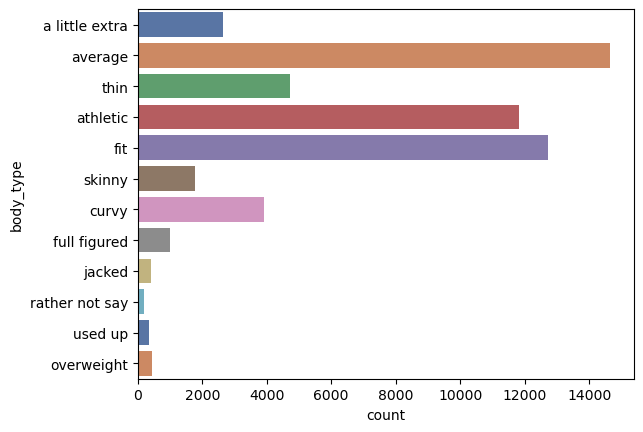

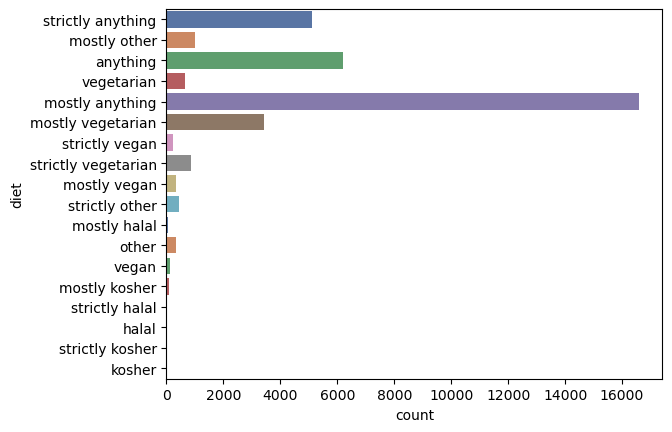

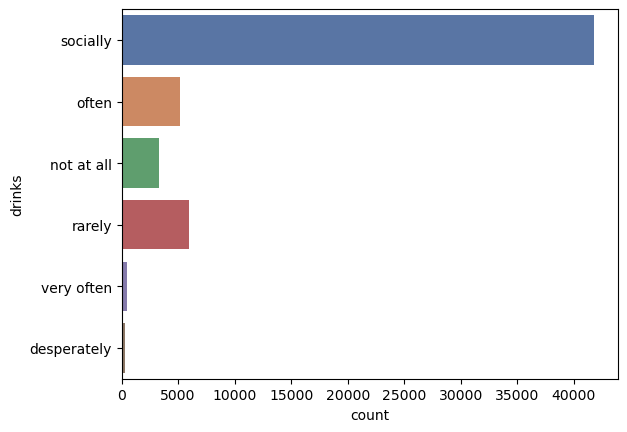

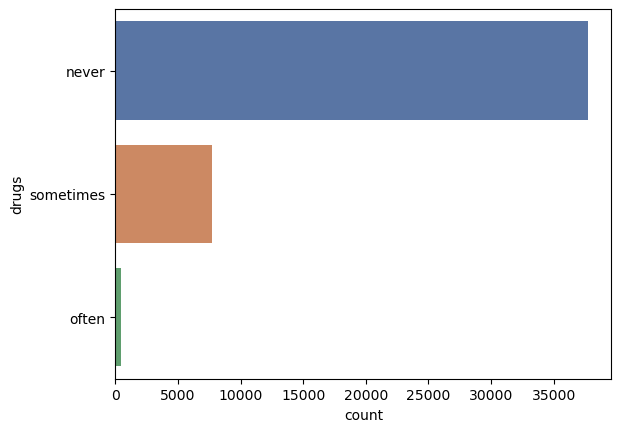

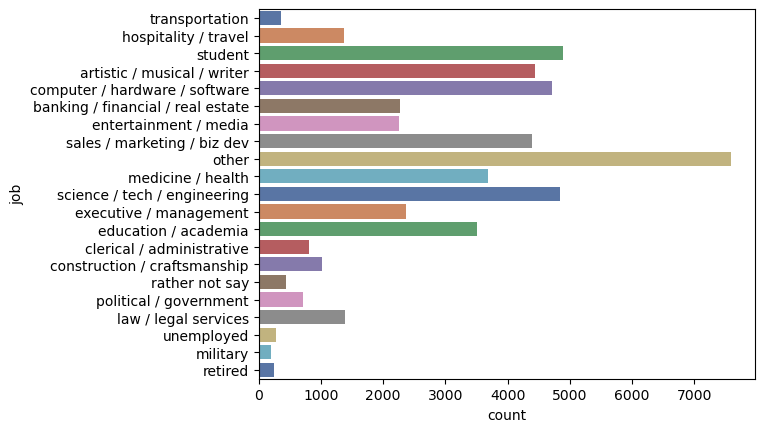

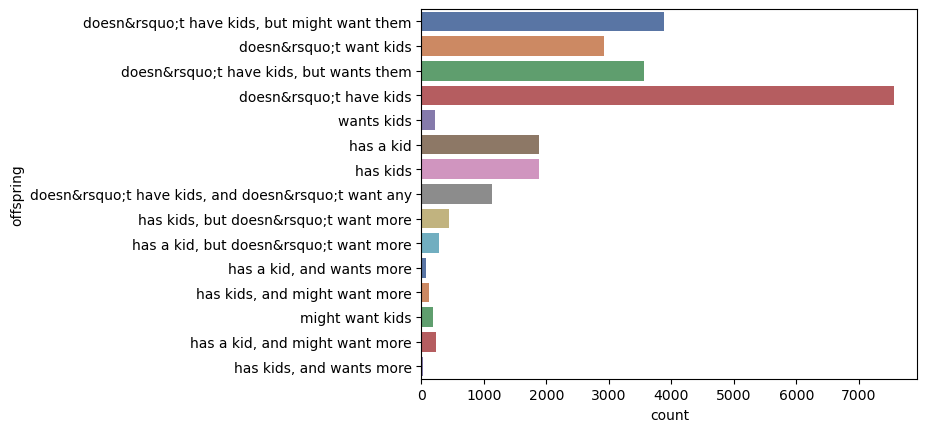

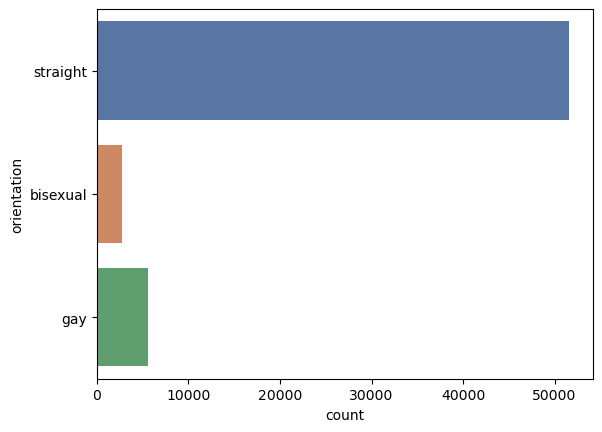

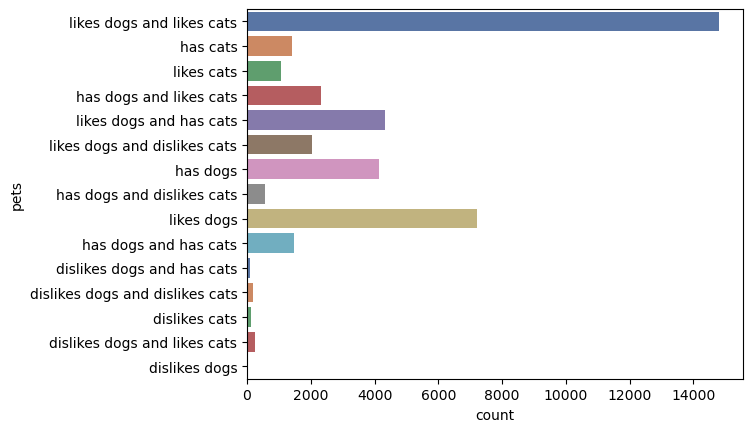

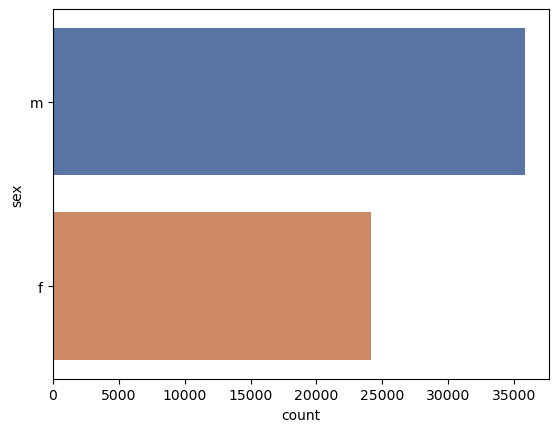

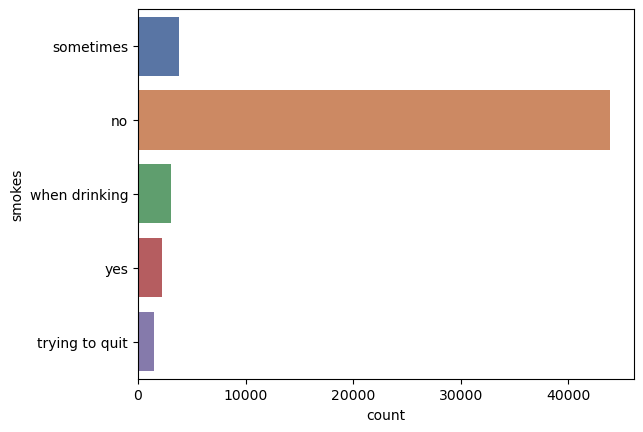

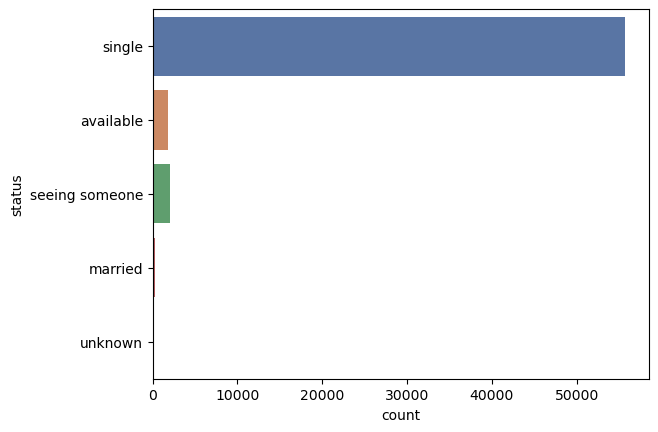

In [6]:
def plot_it(column):
    sns.countplot(y=column, data=profiles, hue=column, palette="deep")
    plt.legend([], [], frameon=False)
    plt.show()

for column in ['body_type', 'diet', 'drinks', 'drugs',
       'job', 'offspring', 'orientation', 'pets', 'sex', 'smokes',
       'status']:
    plot_it(column)

In [7]:
profiles.dtypes

age              int64
body_type       object
diet            object
drinks          object
drugs           object
education       object
essay0          object
essay1          object
essay2          object
essay3          object
essay4          object
essay5          object
essay6          object
essay7          object
essay8          object
essay9          object
ethnicity       object
height         float64
income           int64
job             object
last_online     object
location        object
offspring       object
orientation     object
pets            object
religion        object
sex             object
sign            object
smokes          object
speaks          object
status          object
dtype: object

In [8]:
def make_labels(dataset):
    dataset_copy = dataset.copy()

    categoricals = dataset_copy.select_dtypes(include=['object']).columns
    
    for column in categoricals:
        labeler = LabelEncoder()
        dataset_copy[column] = labeler.fit_transform(dataset_copy[column])
    
    return dataset_copy

## Let's build some models

We'll start with some simple decision trees and random forest classifiers

In [9]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

def make_tree(df, target):
    X = df.drop(target, axis=1)
    y = df[target]

    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

    tree = DecisionTreeClassifier(random_state = 42)
    tree.fit(X_train, y_train)

    predictions = tree.predict(X_test)

    print(f"weighted F1 score: {f1_score(y_test, predictions, average='weighted')}")
    print(f"macro F1 score: {f1_score(y_test, predictions, average='macro')}")
    print(f"None F1 score: {f1_score(y_test, predictions, average=None)}")

In [10]:
def make_forest(df, target):
    X = df.drop(target, axis=1)
    y = df[target]

    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)
    
    forest = RandomForestClassifier(class_weight = 'balanced', random_state = 42)
    forest.fit(X_train, y_train)

    predictions = forest.predict(X_test)

    print(f"weighted F1 score: {f1_score(y_test, predictions, average='weighted')}")
    print(f"macro F1 score: {f1_score(y_test, predictions, average='macro')}")
    print(f"None F1 score: {f1_score(y_test, predictions, average=None)}")

In [11]:
essays = ['essay0', 'essay1', 'essay2', 'essay3', 'essay4', 'essay5', 'essay6', 'essay7', 'essay8', 'essay9']
df_wo_essays = profiles.drop(essays, axis=1).copy()
df = make_labels(df_wo_essays).dropna()
print(df.columns)
print(df.isna().sum())

Index(['age', 'body_type', 'diet', 'drinks', 'drugs', 'education', 'ethnicity',
       'height', 'income', 'job', 'last_online', 'location', 'offspring',
       'orientation', 'pets', 'religion', 'sex', 'sign', 'smokes', 'speaks',
       'status'],
      dtype='object')
age            0
body_type      0
diet           0
drinks         0
drugs          0
education      0
ethnicity      0
height         0
income         0
job            0
last_online    0
location       0
offspring      0
orientation    0
pets           0
religion       0
sex            0
sign           0
smokes         0
speaks         0
status         0
dtype: int64


In [12]:
make_tree(df, "sex")

weighted F1 score: 0.8111517557003383
macro F1 score: 0.8041452043196495
None F1 score: [0.7669111  0.84137931]


In [13]:
make_forest(df, "sex")

weighted F1 score: 0.8711872656949653
macro F1 score: 0.8660505242939852
None F1 score: [0.83875293 0.89334812]


### Let's try some clustering

In [15]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

def scale_it(df):

    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(df)
    scaled_df = pd.DataFrame(scaled_data, columns=df.columns)
    
    return scaled_df

In [16]:
df_scaled = scale_it(df)

In [17]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

def cluster_it(df, n_clusters=3):

    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    labels = kmeans.fit_predict(df)
    
    df['Cluster'] = labels
    
    pca = PCA(n_components=2)
    df_pca = pca.fit_transform(df)
    
    plt.figure(figsize=(8, 6))
    for cluster in range(n_clusters):
        plt.scatter(
            df_pca[labels == cluster, 0], df_pca[labels == cluster, 1],
            label=f"Cluster {cluster}", alpha=0.6
        )
    plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 
                s=200, c='red', label='Centroids', marker='X')
    plt.title('People clustered')
    plt.xlabel('PCA Component 1')
    plt.ylabel('PCA Component 2')
    plt.legend()
    plt.show()
    
    return df, kmeans

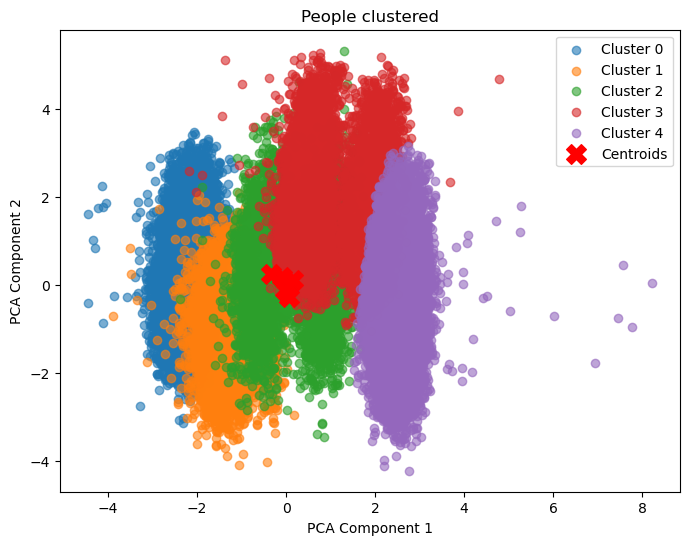

(            age  body_type      diet    drinks     drugs  education  \
 0     -1.093889  -1.132704 -0.037682  0.332265 -0.744189   0.986791   
 1      0.281388  -0.581868 -0.594474 -1.570116  0.791190   1.660782   
 2      0.598759   1.621475 -1.429663  0.332265  1.558880  -0.361193   
 3     -0.988098   1.621475  0.936705  0.332265  1.558880   0.986791   
 4     -0.353355  -0.857286  1.075903  0.332265 -0.744189  -0.698189   
 ...         ...        ...       ...       ...       ...        ...   
 59938  2.820360   2.172311  1.075903  0.332265 -0.744189  -0.698189   
 59939 -0.882308  -0.031032 -1.012069 -1.570116  0.791190   0.986791   
 59940  1.021921  -0.581868 -1.012069 -2.521306 -0.744189  -0.361193   
 59941 -0.564936  -0.857286 -1.012069  0.332265  0.023501   0.986791   
 59942  0.704550  -0.581868  1.075903  0.332265  1.558880  -0.361193   
 
        ethnicity    height    income       job  ...  offspring  orientation  \
 0      -1.098373  1.678374 -0.205811  1.145271  ...  

In [24]:
cluster_it(df_scaled, 5)

### Opposites atract?

In [19]:
print(df_scaled.columns)

Index(['age', 'body_type', 'diet', 'drinks', 'drugs', 'education', 'ethnicity',
       'height', 'income', 'job', 'last_online', 'location', 'offspring',
       'orientation', 'pets', 'religion', 'sex', 'sign', 'smokes', 'speaks',
       'status', 'Cluster'],
      dtype='object')


In [25]:
df_0 = df_scaled[df_scaled["Cluster"] == 0].copy()
df_4 = df_scaled[df_scaled["Cluster"] == 4].copy()

In [26]:
def plot_it_again(df_0, df_4, column):
    fig, axes = plt.subplots(1, 2, figsize=(12, 6), sharey=True)
    
    sns.countplot(y=column, data=df_0, hue=column, palette="deep", ax=axes[0])
    axes[0].set_title(f"Cluster 0 - {column}")
    axes[0].legend([], [], frameon=False)

    sns.countplot(y=column, data=df_4, hue=column, palette="deep", ax=axes[1])
    axes[1].set_title(f"Cluster 4 - {column}")
    axes[1].legend([], [], frameon=False)
    
    plt.tight_layout()
    plt.show()

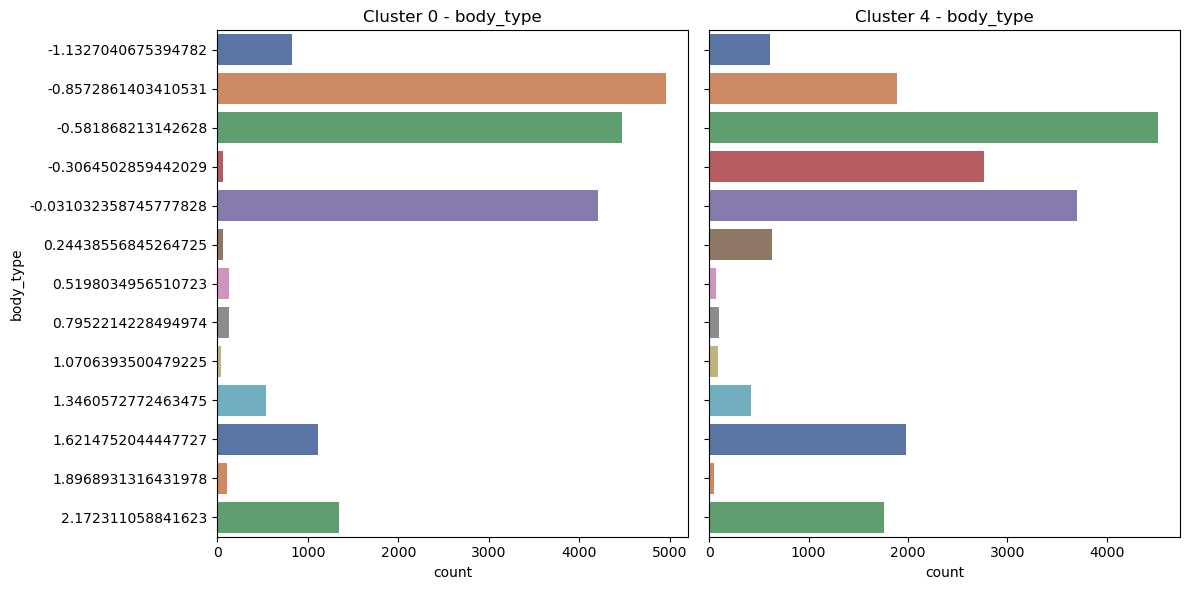

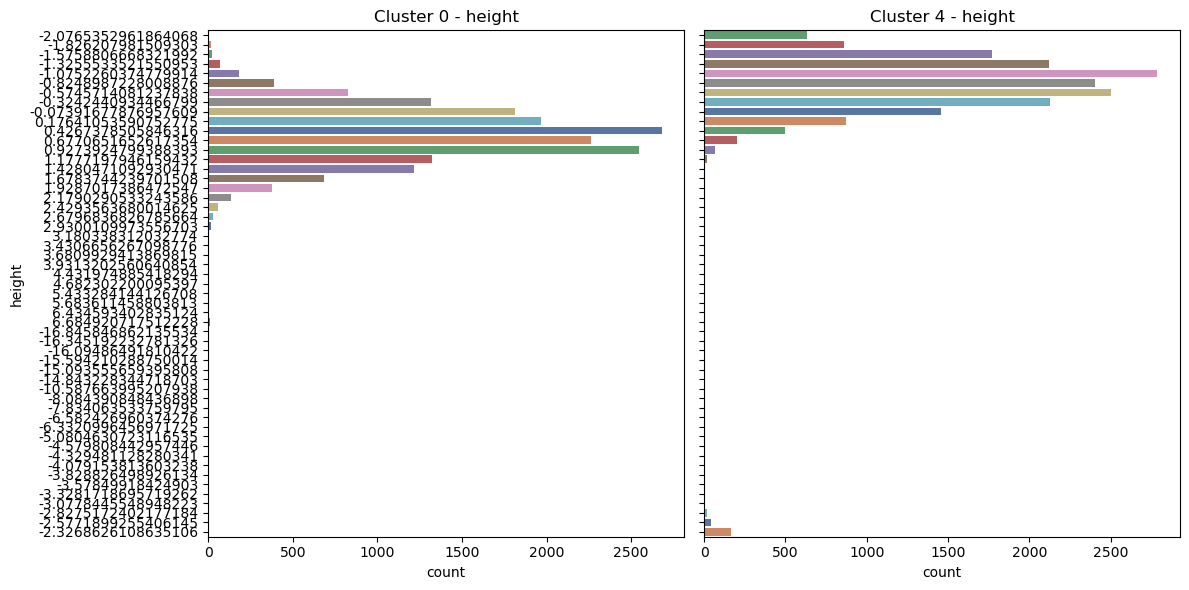

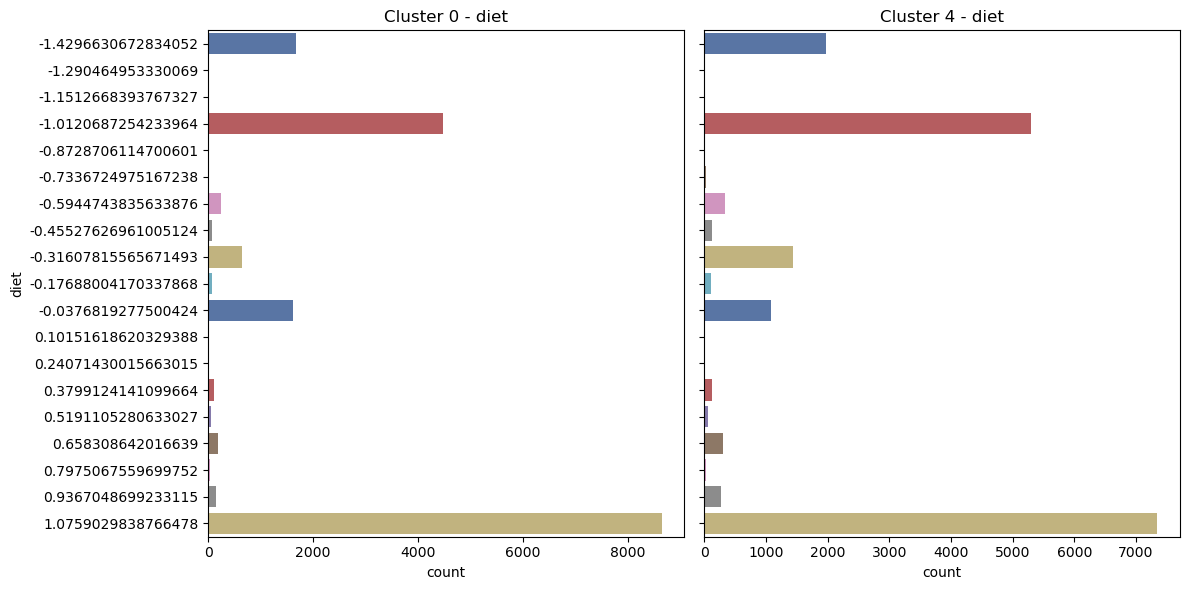

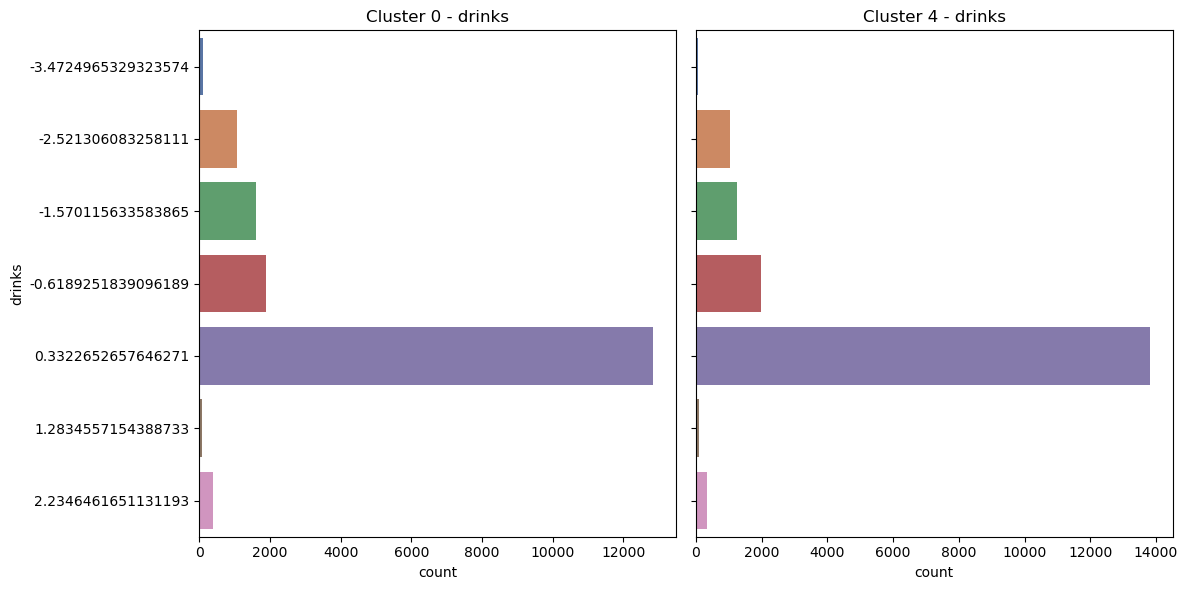

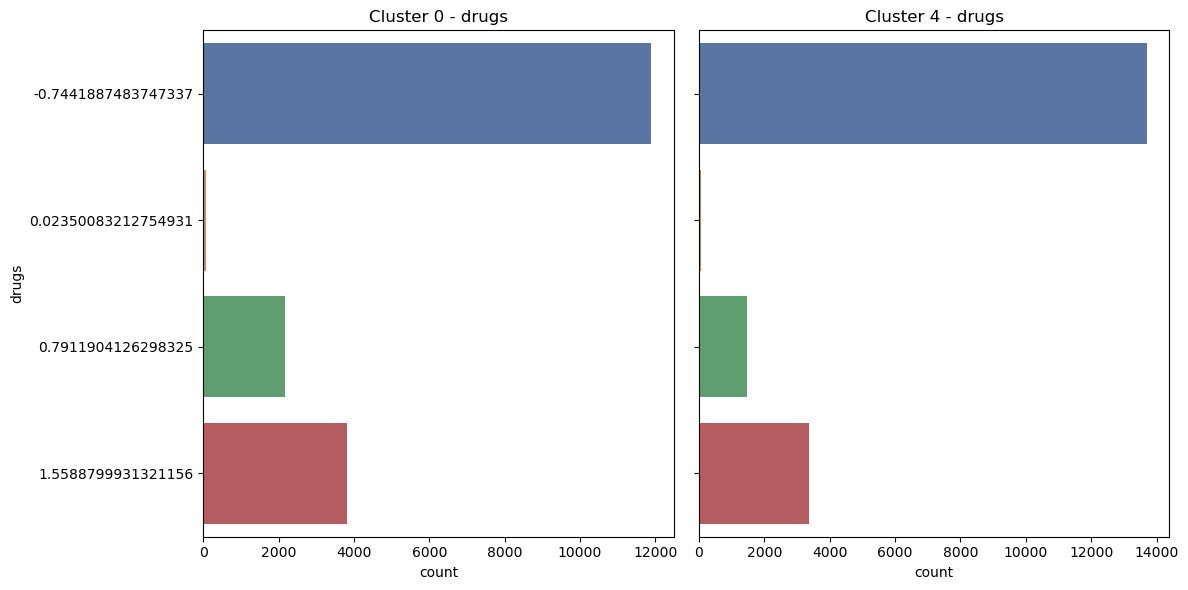

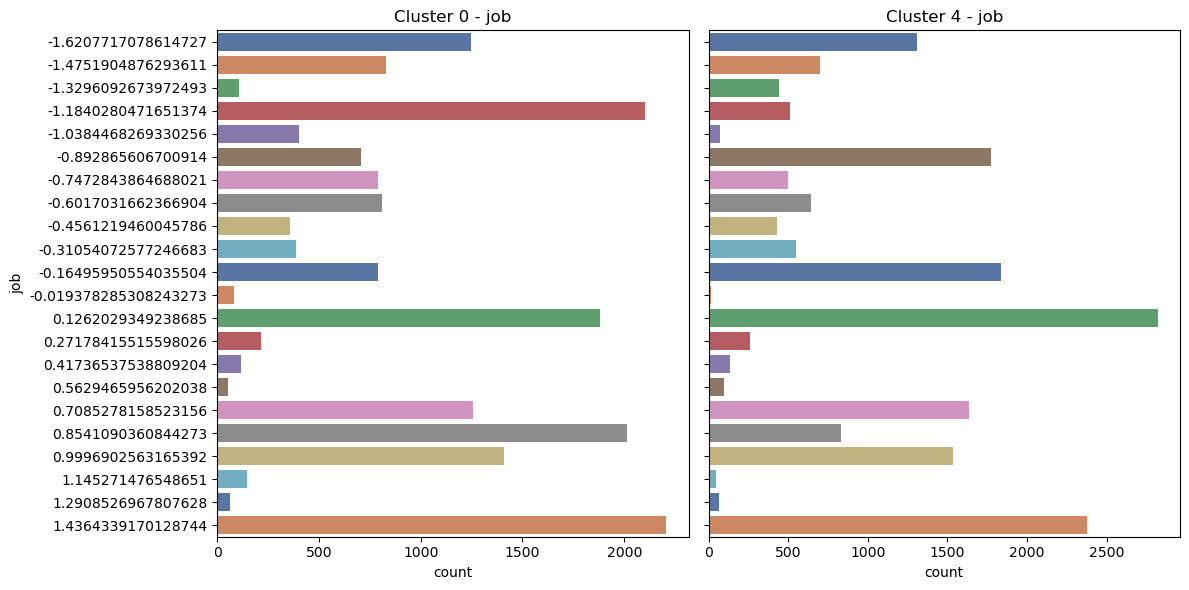

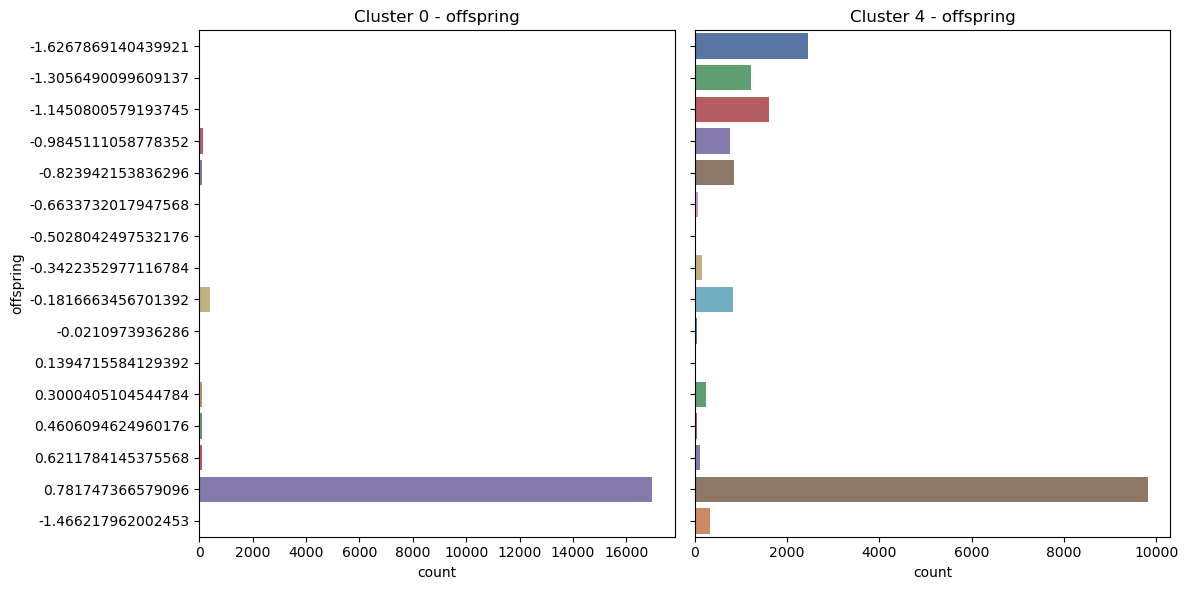

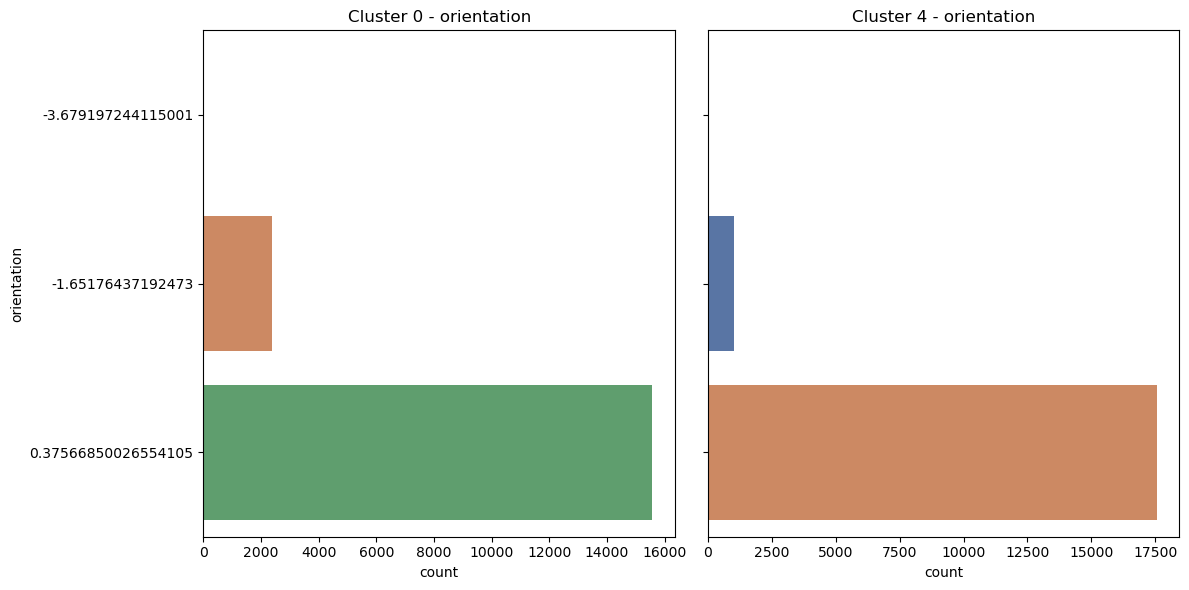

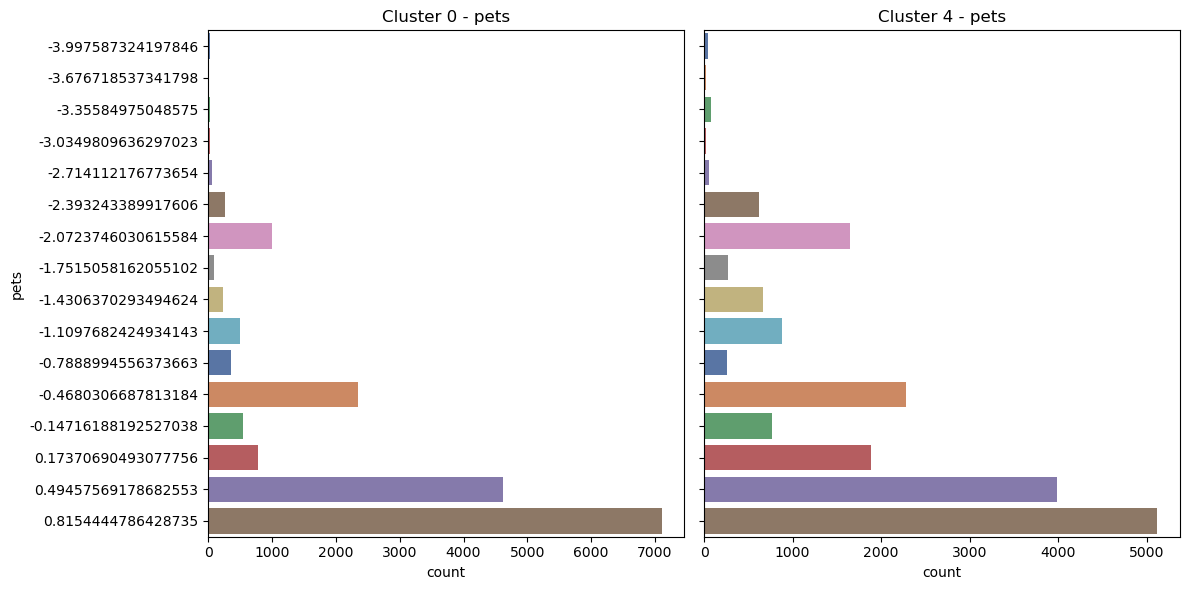

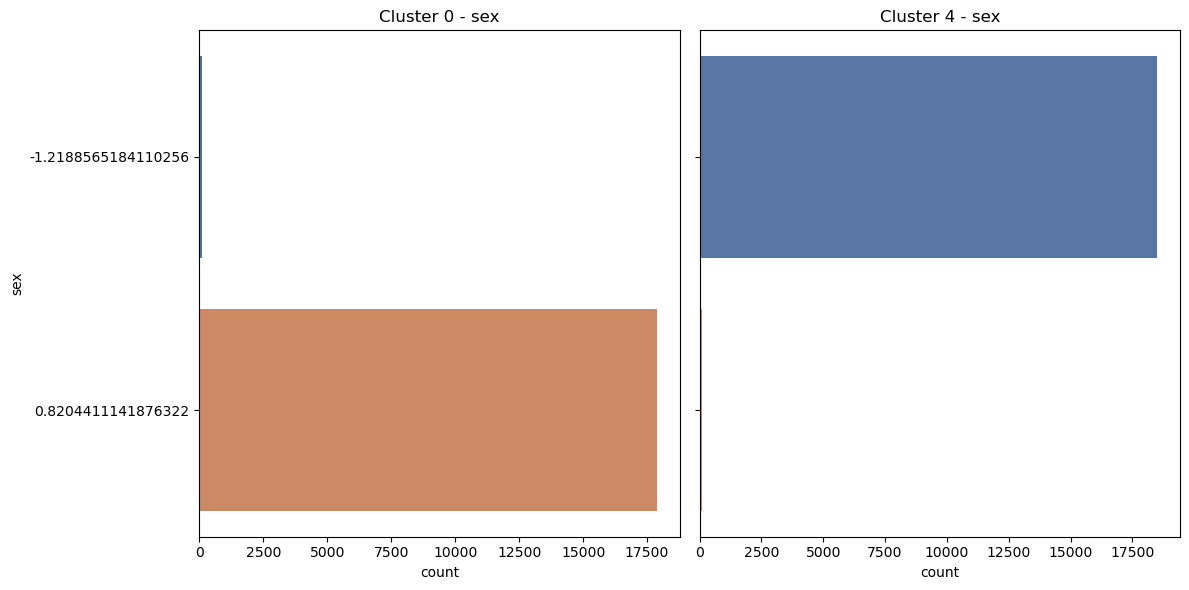

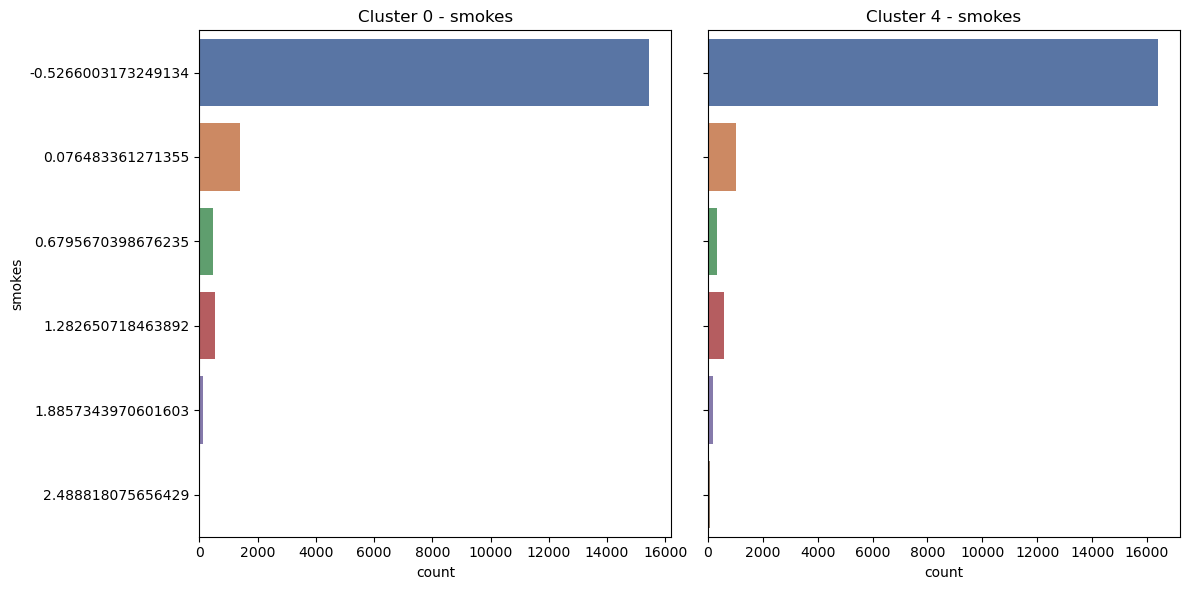

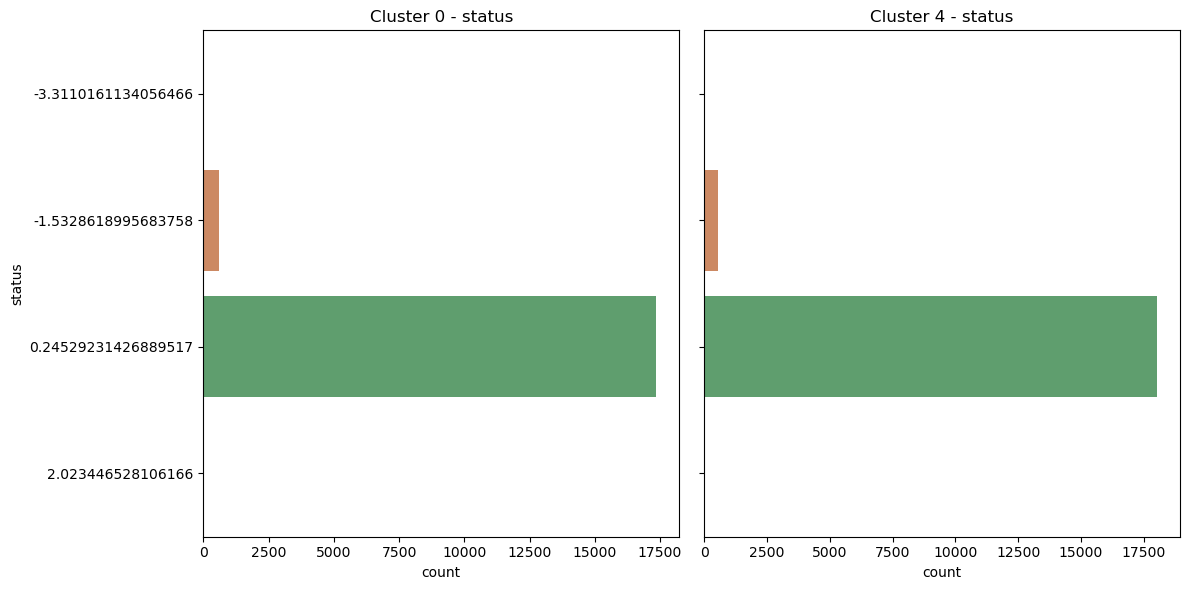

In [28]:
for column in ['body_type', "height", 'diet', 'drinks', 'drugs',
       'job', 'offspring', 'orientation', 'pets', 'sex', 'smokes',
       'status']:
    plot_it_again(df_0, df_4, column)

...if so, these two distant groups differ most in height, kids and... gender it is. Very surprising.